**IMPORT LIBRARY**

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline
import folium
import pickle

**EDA**

In [2]:
df = pd.read_csv('databaru.csv')
df

,Id,thetao,chl,Lat,Lon
0,87513,23.2689,0.246682,-6.879081,105.537415
1,87541,23.2689,0.246682,-6.883248,105.529081
2,87845,21.9934,0.289332,-6.929081,105.808248
3,87873,23.0011,0.289332,-6.933248,105.733248
4,87874,21.9934,0.289332,-6.933248,105.791752
...,...,...,...,...,...
5339,104533,28.4393,0.149617,-13.783248,120.020748
5340,104554,28.3782,0.149617,-13.841581,119.916581
5341,104574,28.4142,0.149617,-13.866581,120.020748
5342,104576,28.4142,0.149617,-13.870748,119.991581


In [3]:
df.isna().sum()

Id        0
thetao    0
chl       0
Lat       0
Lon       0
dtype: int64

In [4]:
df.dtypes

Id          int64
thetao    float64
chl       float64
Lat       float64
Lon       float64
dtype: object

In [5]:
x = df[["Lat","Lon"]]

In [6]:
x.head()

,Lat,Lon
0,-6.879081,105.537415
1,-6.883248,105.529081
2,-6.929081,105.808248
3,-6.933248,105.733248
4,-6.933248,105.791752


In [7]:
model =KMeans(n_clusters=2)
y_kmeans =model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
df['y']=y_kmeans

In [9]:
df.head()

,Id,thetao,chl,Lat,Lon,y
0,87513,23.2689,0.246682,-6.879081,105.537415,0
1,87541,23.2689,0.246682,-6.883248,105.529081,0
2,87845,21.9934,0.289332,-6.929081,105.808248,0
3,87873,23.0011,0.289332,-6.933248,105.733248,0
4,87874,21.9934,0.289332,-6.933248,105.791752,0


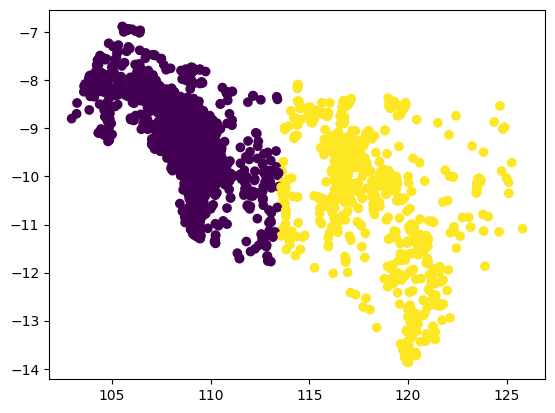

In [10]:
plt.scatter(df['Lon'],df['Lat'], c=df['y'])

In [11]:
model.inertia_

19953.954564810294

**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

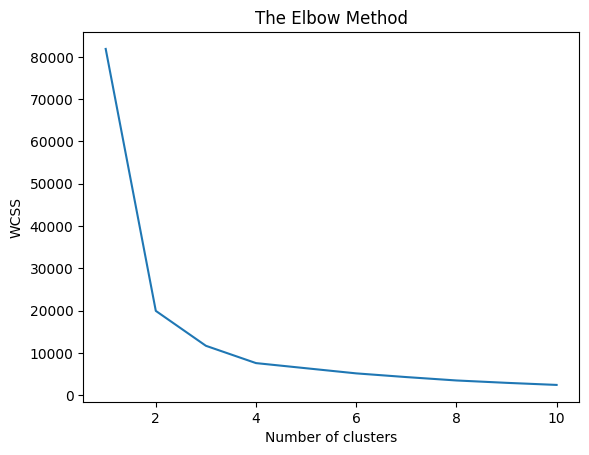

In [12]:
#menggunakan elbow method untuk menemukan nomor cluster yang optimal menggunakan sklearn libraries
#import library
from sklearn.cluster import KMeans
#membuat array dengan nama wcss
wcss = []
#melakukan perulangan dari 1 sampai 11
for i in range(1, 11):
    #membuat nama variabel = kmeans yang mendeskripsikan jumlah cluster, perulangan k-means, dan random statenya
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)
#menampilkan plot wcss

plt.plot(range(1, 11), wcss)
#memberikan label plot dengan judul The Elbow Method
plt.title('The Elbow Method')
#memberikan label x dengan nama Number of clusters
plt.xlabel('Number of clusters')
#memberikan label y dengan nama WCSS
plt.ylabel('WCSS')
#menampilkan plot
plt.show()

In [13]:
df =df[:2500]

cluster1 = df[['Lat','Lon']][df['y']==0].values.tolist()
cluster2 = df[['Lat','Lon']][df['y']==1].values.tolist()
cluster3 = df[['Lat','Lon']][df['y']==2].values.tolist()

In [14]:
map = folium.Map(location=[-8.103, 110.431], zoom_start=7, tiles="openstreetmap")
map

In [15]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)

for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)


In [16]:
map

In [17]:
clustering_kmeans = KMeans(n_clusters=2)
x['cluster'] = clustering_kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-d23dd3443383>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] = clustering_kmeans.fit_predict(x)


In [18]:
x['cluster'].value_counts()

0    4555
1     789
Name: cluster, dtype: int64

**VALIDASI DENGAN SILHOUETTE**

In [19]:
silhouette_avg = metrics.silhouette_score(x, x['cluster'])
print ('silhouette coefficient for the clustering above = ', silhouette_avg)

silhouette coefficient for the clustering above =  0.770714287103377


In [20]:
pickle.dump(clustering_kmeans, open('model.pkl','wb'))

In [21]:
model=pickle.load(open('model.pkl','rb'))